# PES University, Bangalore
Established under Karnataka Act No. 16 of 2013

## UE22AM343AB4 - Advanced Data Analytics

Designed by Nischal H S

### Student Details
- Name : **Student Name**
- SRN : **SRN**

# ADA Worksheet Part B

## Adult Census Income Cleaning and Analysis

### Introduction

As a data scientist intern at the U.S. Census Bureau, you've been assigned to clean and analyze the Adult Census Income dataset. Your task is to prepare the data for a machine learning model that will predict whether an individual's annual income exceeds $50,000. This analysis will inform government policies on education, employment, and economic development.
The dataset contains various demographic and socioeconomic factors, but it requires careful preprocessing to ensure accurate results. Your work will involve handling missing data, encoding categorical variables, and performing exploratory data analysis.

First, let's import some of the necessary libraries and load the data.

In [77]:
# might make it easier to install the packages directly to ipynb kernel for this to work, so please run this
%pip install pandas numpy matplotlib seaborn scikit-learn scipy imbalanced-learn

In [78]:
# Note: This assignment might need you to look up syntax, parameters, functions a lot for some libraries, so I am linking the documentation. Most of these should have a search bar to find what you're looking for.
# pandas: https://pandas.pydata.org/docs/user_guide/index.html
# numpy: https://numpy.org/doc/stable/user/index.html
# matplotlib: https://matplotlib.org/stable/contents.html
# seaborn: https://seaborn.pydata.org/tutorial.html




import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

# TODO: Load the data into a pandas DataFrame named 'df'
# Hint: Use pd.read_csv() with the url and column_names

df = pd.read_csv(url, names=column_names, sep=",\s", na_values=["?"], engine="python")
# Display the first few rows and basic information about the dataset

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [80]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Question 1: Missing Values

Examine the dataset for missing values. In this dataset, missing values are represented as "?".

a) How many missing values are there in each column?

b) What percentage of the dataset is missing?

In [81]:
# TODO: Count the number of missing values in each column
# Hint: Use df.isin() with the right parameter
df.isna().sum() / len(df) * 100
# TODO: Calculate the percentage of missing values in the entire dataset

,0
age,0.000000
workclass,5.638647
fnlwgt,0.000000
education,0.000000
education-num,0.000000
marital-status,0.000000
occupation,5.660146
relationship,0.000000
race,0.000000
sex,0.000000


## Question 2: Handling Missing Values

Choose an appropriate strategy to handle missing values in the 'workclass' and 'occupation' columns.

a) Explain your chosen strategy and why you think it's appropriate.

b) Implement your strategy.

In [82]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [83]:
a = df[['race', 'native-country']]
for i in a.value_counts().items():
    print(i)

(('White', 'United-States'), 25621)
(('Black', 'United-States'), 2832)
(('White', 'Mexico'), 590)
(('Amer-Indian-Eskimo', 'United-States'), 296)
(('Asian-Pac-Islander', 'United-States'), 292)
(('Asian-Pac-Islander', 'Philippines'), 188)
(('Other', 'United-States'), 129)
(('White', 'Germany'), 124)
(('White', 'Canada'), 119)
(('White', 'El-Salvador'), 101)
(('White', 'Cuba'), 90)
(('Asian-Pac-Islander', 'India'), 85)
(('White', 'Puerto-Rico'), 82)
(('White', 'England'), 81)
(('Asian-Pac-Islander', 'South'), 77)
(('Black', 'Jamaica'), 75)
(('Asian-Pac-Islander', 'China'), 73)
(('White', 'Italy'), 73)
(('Asian-Pac-Islander', 'Vietnam'), 65)
(('White', 'Guatemala'), 60)
(('White', 'Poland'), 59)
(('White', 'Columbia'), 51)
(('Asian-Pac-Islander', 'Taiwan'), 48)
(('Black', 'Haiti'), 43)
(('Other', 'Mexico'), 40)
(('White', 'Dominican-Republic'), 39)
(('Asian-Pac-Islander', 'Japan'), 38)
(('White', 'Portugal'), 36)
(('White', 'Iran'), 35)
(('White', 'Peru'), 30)
(('White', 'France'), 28)
(('

In [84]:
occupation_dict = {}
a = df[["occupation", "education"]]
for i in list(a.value_counts().items()):
    if i[0][1] not in occupation_dict:
        occupation_dict[i[0][1]] = i[0][0]
occupation_dict

{'HS-grad': 'Craft-repair',
 'Bachelors': 'Prof-specialty',
 'Some-college': 'Adm-clerical',
 'Masters': 'Prof-specialty',
 'Prof-school': 'Prof-specialty',
 'Doctorate': 'Prof-specialty',
 'Assoc-voc': 'Craft-repair',
 '11th': 'Other-service',
 '10th': 'Other-service',
 'Assoc-acdm': 'Adm-clerical',
 '7th-8th': 'Craft-repair',
 '9th': 'Other-service',
 '12th': 'Other-service',
 '5th-6th': 'Other-service',
 '1st-4th': 'Other-service',
 'Preschool': 'Other-service'}

In [85]:
workclass_dict = {}
a = df[["workclass", "occupation"]]
for i in list(a.value_counts().items()):
    if i[0][1] not in workclass_dict:
        workclass_dict[i[0][1]] = i[0][0]
workclass_dict

{'Craft-repair': 'Private',
 'Sales': 'Private',
 'Adm-clerical': 'Private',
 'Other-service': 'Private',
 'Exec-managerial': 'Private',
 'Prof-specialty': 'Private',
 'Machine-op-inspct': 'Private',
 'Handlers-cleaners': 'Private',
 'Transport-moving': 'Private',
 'Tech-support': 'Private',
 'Farming-fishing': 'Private',
 'Protective-serv': 'Local-gov',
 'Priv-house-serv': 'Private',
 'Armed-Forces': 'Federal-gov'}

In [86]:
# TODO: Implement your chosen strategy for handling missing values
# This might involve imputation, removal, or other techniques. Think carefully about the type of missingness and how it should be handled

import pandas as pd


def handle_missing_workclass(df):
    """
    Handle missing values in the 'workclass' column.
    """
    df["workclass"] = df.apply(
        lambda row: (
            "Other"
            if pd.isnull(row["workclass"]) and pd.isnull(row["occupation"])
            else (
                workclass_dict[row["occupation"]]
                if pd.isnull(row["workclass"])
                else row["workclass"]
            )
        ),
        axis=1,
    )
    return df


def handle_missing_occupation(df):
    """
    Handle missing values in the 'occupation' column.
    """
    df["occupation"] = df.apply(
        lambda row: (
            occupation_dict[row["education"]] if pd.isnull(row["occupation"]) else row["occupation"]
        ),
        axis=1
    )
    return df


def handle_missing_native_country(df):
    """
    Handle missing values in the 'native-country' column.
    """
    df["native-country"].fillna("United-States", inplace=True)
    return df


# Call the functions to update the DataFrame
df = handle_missing_workclass(df)
df = handle_missing_occupation(df)
df = handle_missing_native_country(df)
df.isna().sum()
# Hint: You could use the mode() method to impute missing values
# Can you go one step ahead and consider the other columns before deciding what value to impute in a row?

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


## Question 3: Categorical Variables

Identify all categorical variables in the dataset.

a) List the categorical variables and their unique values.

b) Are there any categorical variables that have an unusually high number of categories? How might you handle this?

In [87]:
# TODO: Identify and list categorical variables
# Hint: Use the select_dtypes() method to identify columns with object dtype
categorical = df.select_dtypes(include=["object"]).columns
categorical
# TODO: Display unique values for each categorical variable
# Hint: You can use the unique() method to get the unique values for each column

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')

In [88]:
df[categorical].nunique()

,0
workclass,9
education,16
marital-status,7
occupation,14
relationship,6
race,5
sex,2
native-country,41
income,2


Native country has very high number of values, we can encode the frequency of the values to show how import they are

In [89]:
encoded_df = df[categorical]

## Question 4: Encoding Categorical Variables

Choose appropriate encoding techniques for the categorical variables. You may use different techniques for different variables based on their characteristics.

a) Explain your choice of encoding technique for each categorical variable.

b) Implement the encoding.

In [90]:
# TODO: Implement encoding for categorical variables
# This might involve one-hot encoding, label encoding, or other techniques
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def encode_binary_categorical(df, columns):
    """
    Encode a binary categorical variable using label encoding.
    """
    # Hint: Use the LabelEncoder class from sklearn.preprocessing
    encoder = LabelEncoder()
    for column in columns:
        df[column] = encoder.fit_transform(df[column])
    return df

def encode_multi_categorical(df, columns):
    """
    Encode multi-class categorical variables using one-hot encoding.
    """
    # Hint: Use the OneHotEncoder class from sklearn.preprocessing
    encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid multicollinearity
    encoded_columns = encoder.fit_transform(df[columns])
    encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns))
    df = df.drop(columns, axis=1)
    df = pd.concat([df, encoded_df], axis=1)
    return df

def frequency_encoding(df, columns):
    """
    Encode multi-class categorical
    """
    for column in columns:
        freq = df[column].value_counts(normalize=True)
        df[column] = df[column].map(freq)
    return df

encoded_df = encode_binary_categorical(encoded_df, ["sex", "income"])
encoded_df = encode_multi_categorical(encoded_df, ["race", "workclass", "marital-status", "relationship"])
encoded_df = frequency_encoding(encoded_df, ["education", "occupation", "native-country"])
encoded_df

<ipython-input-90-9a18ef3627d3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = encoder.fit_transform(df[column])
<ipython-input-90-9a18ef3627d3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = encoder.fit_transform(df[column])


,education,occupation,sex,native-country,income,race_Asian-Pac-Islander,race_Black,race_Other,race_White,workclass_Local-gov,...,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,0.164461,0.133073,1,0.913762,0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.164461,0.124873,1,0.913762,0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.322502,0.042075,1,0.913762,0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.036086,0.042075,1,0.913762,0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.164461,0.134947,0,0.002918,0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.032769,0.028500,0,0.913762,0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
32557,0.322502,0.061485,1,0.913762,1,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32558,0.322502,0.133073,0,0.913762,0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
32559,0.322502,0.133073,1,0.913762,0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Question 5: Numerical Variables

Analyze the numerical variables in the dataset.

a) Create histograms for each numerical variable.

b) Identify any variables that appear to be skewed. How might you handle this skewness?

In [91]:
numerical = df.select_dtypes(include=["int64", "float64"]).columns
numerical

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [92]:
numerical_df = df[numerical]

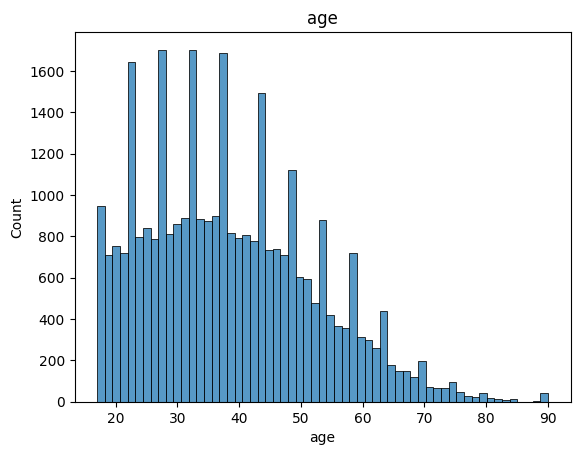

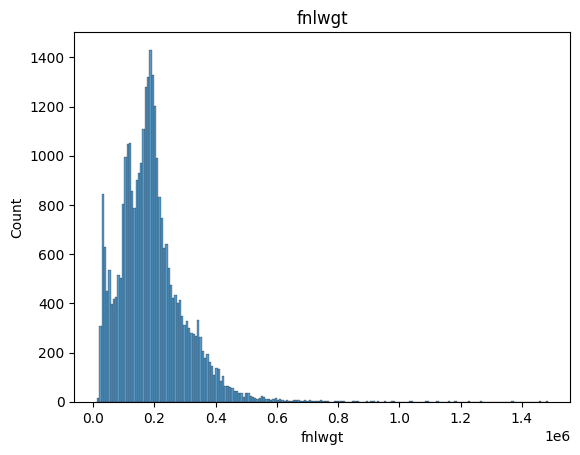

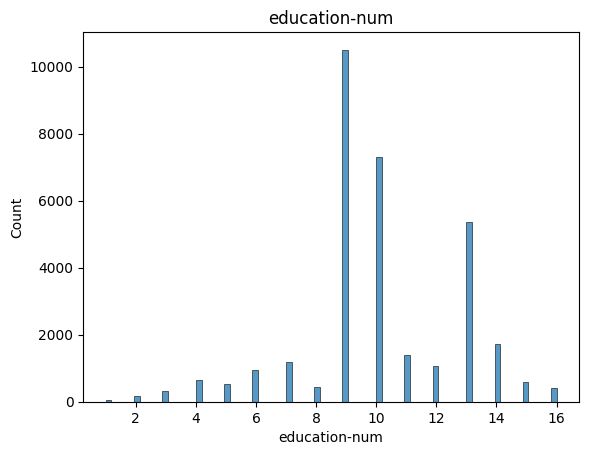

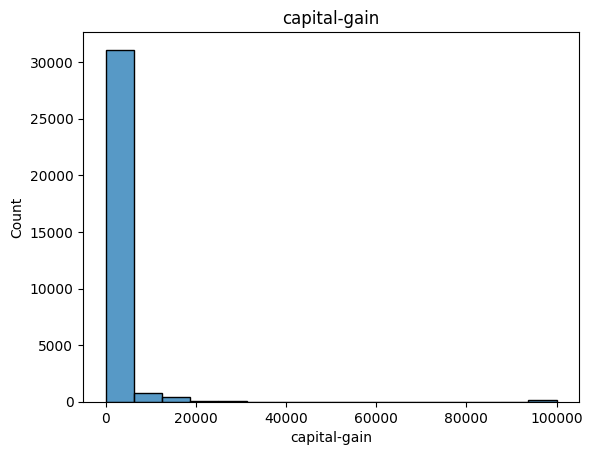

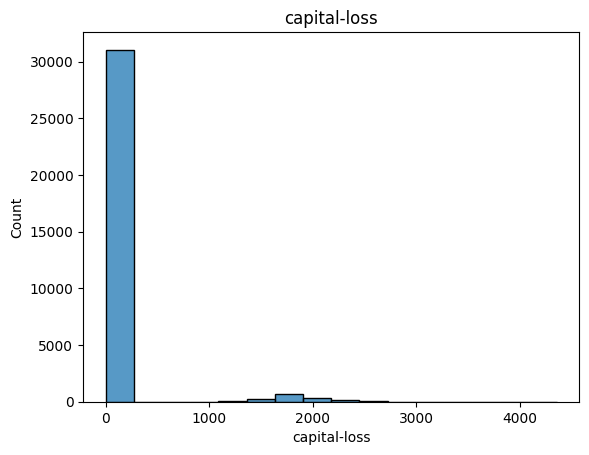

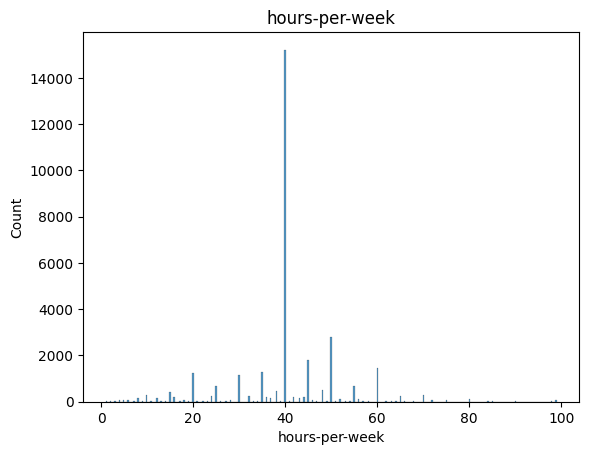

In [93]:
for i in numerical:
    sns.histplot(data=numerical_df, x=i)
    plt.title(i)
    plt.show()

In [94]:
numerical_df.skew(axis=0, numeric_only=True)

,0
age,0.558743
fnlwgt,1.446980
education-num,-0.311676
capital-gain,11.953848
capital-loss,4.594629
hours-per-week,0.227643


In [95]:
skewed_vars = abs(numerical_df.skew(axis=0, numeric_only=True)) > 0.5
skewed_vars = skewed_vars[skewed_vars].index
skewed_vars

Index(['age', 'fnlwgt', 'capital-gain', 'capital-loss'], dtype='object')

In [96]:
# TODO: Create histograms for numerical variables
# Hint: Use the histplot() function from the seaborn library

# TODO: Identify skewed variables and suggest transformations
# Hint: You can use the skew() method to identify skewed variables
# For transformations, you could consider using the np.log1p() function
# Verify the effectiveness of your transformation



def transform_skewed_variables(df, skewed_vars):
    """
    Apply transformation to skewed numerical variables.
    """
    for var in skewed_vars:
        df[var] = np.log1p(df[var])
    return df

numerical_df = transform_skewed_variables(numerical_df, skewed_vars)

<ipython-input-96-1b677f3c0c1f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var] = np.log1p(df[var])


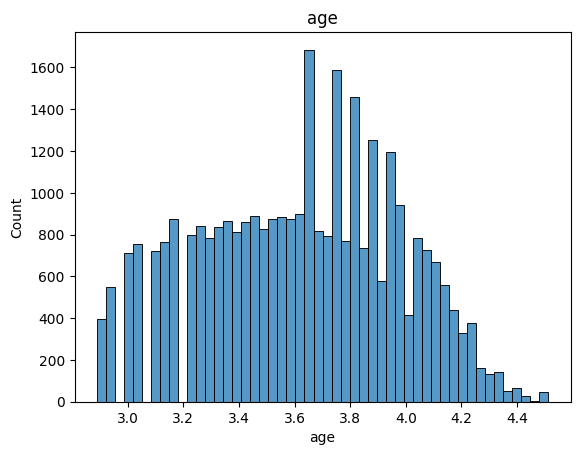

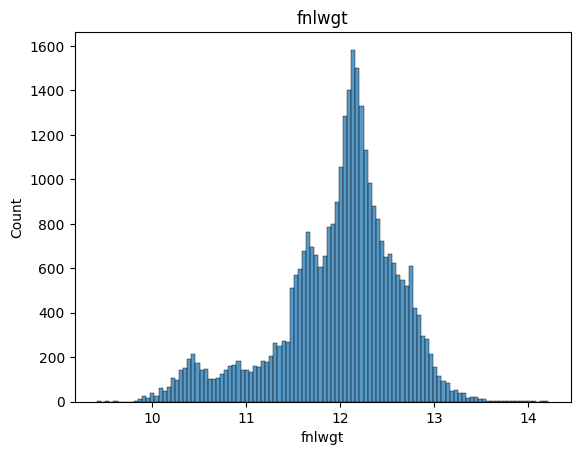

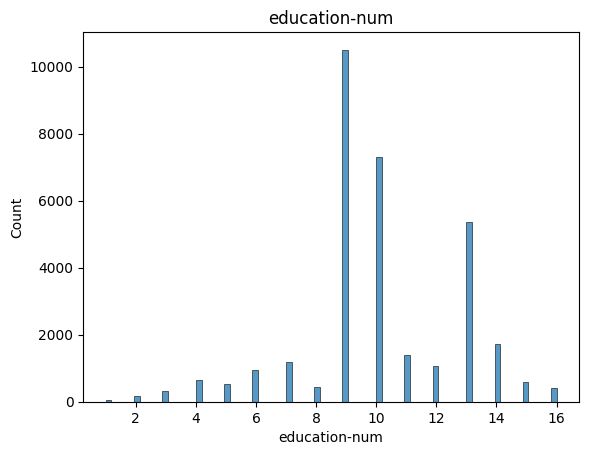

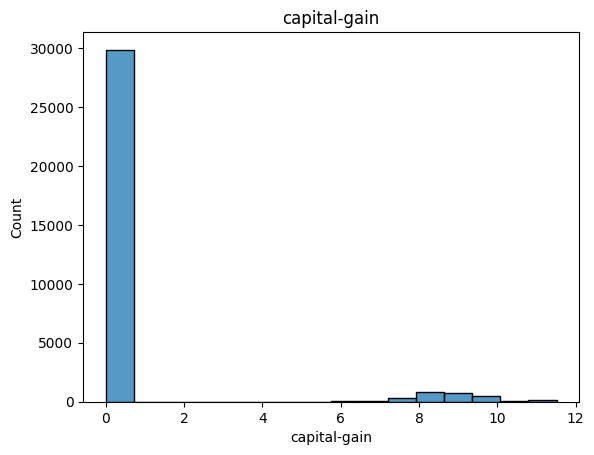

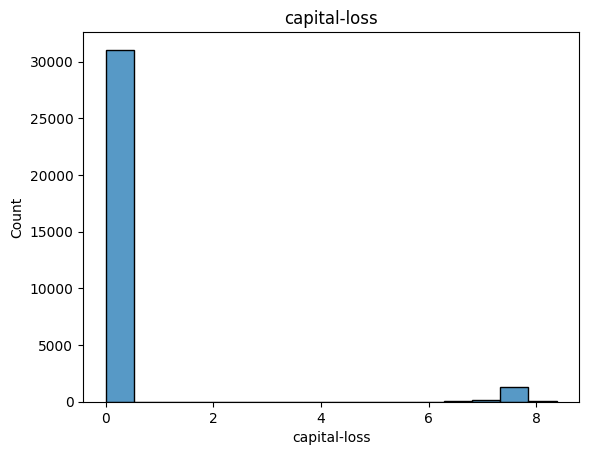

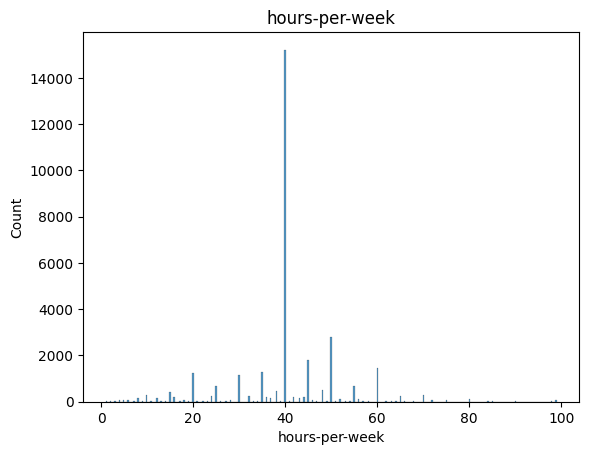

In [97]:
for i in numerical:
    sns.histplot(data=numerical_df, x=i)
    plt.title(i)
    plt.show()

In [98]:
numerical_df.skew(axis=0, numeric_only=True)

,0
age,-0.113341
fnlwgt,-0.842461
education-num,-0.311676
capital-gain,3.096144
capital-loss,4.307537
hours-per-week,0.227643


In [99]:
df = pd.concat([numerical_df, encoded_df], axis=1)
df

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,education,occupation,sex,native-country,...,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,3.688879,11.258253,13,7.684784,0.0,40,0.164461,0.133073,1,0.913762,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,3.931826,11.330348,13,0.000000,0.0,13,0.164461,0.124873,1,0.913762,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.663562,12.281398,9,0.000000,0.0,40,0.322502,0.042075,1,0.913762,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3.988984,12.366157,7,0.000000,0.0,40,0.036086,0.042075,1,0.913762,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.367296,12.732013,13,0.000000,0.0,40,0.164461,0.134947,0,0.002918,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,3.332205,12.458010,12,0.000000,0.0,38,0.032769,0.028500,0,0.913762,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
32557,3.713572,11.947140,9,0.000000,0.0,40,0.322502,0.061485,1,0.913762,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32558,4.077537,11.931050,9,0.000000,0.0,40,0.322502,0.133073,0,0.913762,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
32559,3.135494,12.213500,9,0.000000,0.0,20,0.322502,0.133073,1,0.913762,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Question 6: Outlier Detection

Implement a method to detect outliers in the 'capital-gain' and 'capital-loss' columns.

a) What method did you choose and why?
b) How many outliers did you detect?
c) Propose a strategy for handling these outliers.

(a)**Method:** Z-score method using scipy.stats.zscore()

Reason:
* The Z-score allows us to quantify how extreme a data point is relative to the mean and standard deviation of the dataset.
* By setting a threshold (|Z| > 3), we can identify points that are significantly different from the rest of the data, which are considered outliers.

<Axes: >

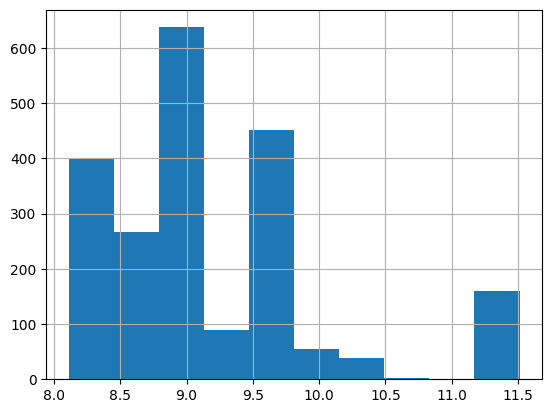

In [100]:
import scipy
a = df["capital-gain"][np.abs(scipy.stats.zscore(df["capital-gain"])) > 3]
a.hist()

<Axes: >

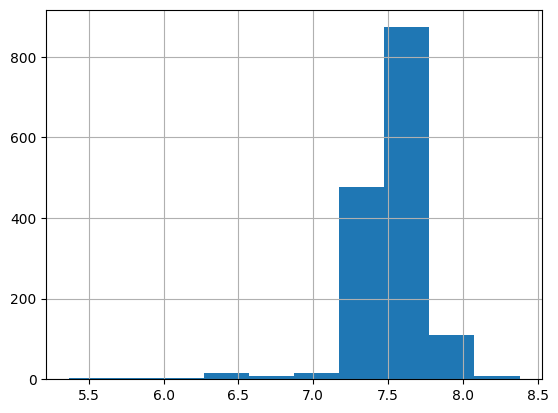

In [101]:
b = df["capital-loss"][np.abs(scipy.stats.zscore(df["capital-loss"])) > 3]
b.hist()


In [102]:
print(len(a), len(b))

2100 1518


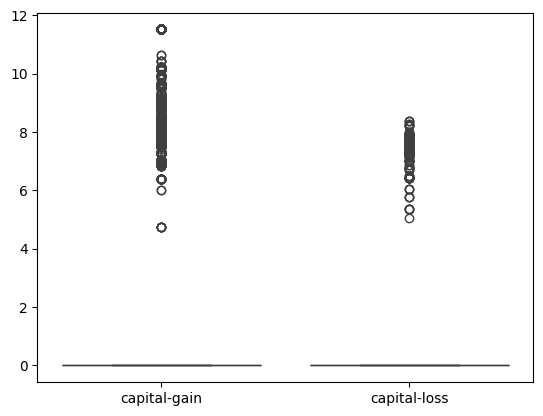

In [103]:
sns.boxplot(data=df[["capital-gain", "capital-loss"]])
plt.show()

In [104]:
# TODO: Implement outlier detection for 'capital-gain' and 'capital-loss'
# Hint: Use the zscore() function from the scipy.stats module to detect outliers

# TODO: Visualize outliers
# Hint: A certain kind of plot is usually used to visualise outliers. Use the seaborn library
def handle_outliers(df, columns, quantile=0.95):
    """
    Handle outliers using winsorization.
    """
    for column in columns:
        lower_bound = df[column].quantile(1 - quantile)
        upper_bound = df[column].quantile(quantile)

        # Apply winsorization
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    return df

# Call the function to handle outliers in 'capital-gain' and 'capital-loss'
df = handle_outliers(df, ['capital-gain', 'capital-loss'])





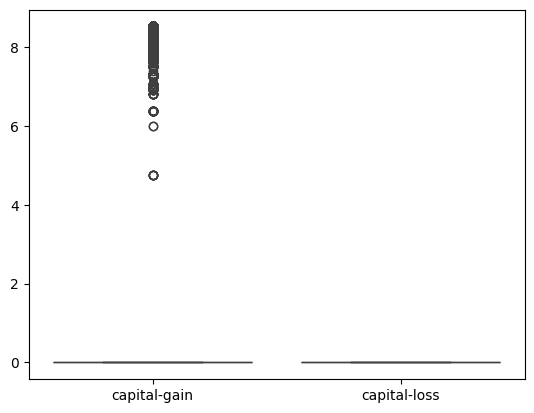

In [105]:
sns.boxplot(data=df[["capital-gain", "capital-loss"]])
plt.show()

## Question 7: Correlation Analysis

Perform a correlation analysis on the numerical variables.

a) Create a heatmap of the correlation matrix.

b) Identify any highly correlated pairs of features. How might this impact a machine learning model?

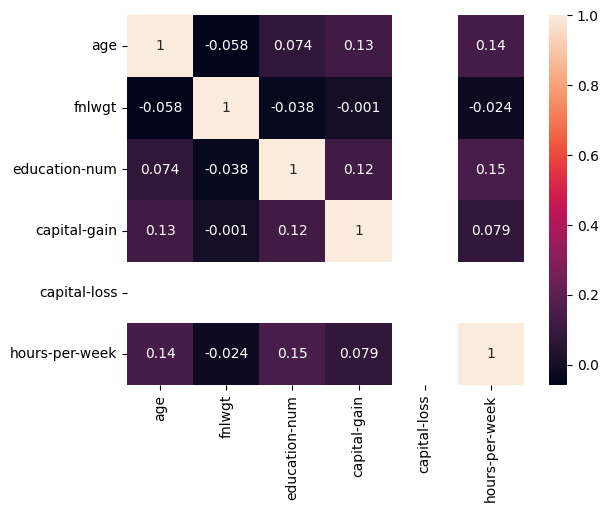

,col1,col2
0,age,marital-status_Never-married
1,race_Black,race_White
2,race_White,race_Black
3,marital-status_Married-civ-spouse,marital-status_Never-married
4,marital-status_Married-civ-spouse,relationship_Not-in-family
5,marital-status_Never-married,age
6,marital-status_Never-married,marital-status_Married-civ-spouse
7,marital-status_Never-married,relationship_Own-child
8,relationship_Not-in-family,marital-status_Married-civ-spouse
9,relationship_Own-child,marital-status_Never-married


In [106]:
# TODO: Compute correlation matrix
# Hint: Use the corr() method on the DataFrame
corr = df.corr()
sns.heatmap(df[numerical].corr(), annot=True)
plt.show()
# TODO: Create a heatmap
# Hint: Use the heatmap() function from the seaborn library
high_corr = np.where((np.abs(corr) > 0.5) & (np.abs(corr) < 1))
l = []
for i in zip(*high_corr):
    l.append([df.columns[i[0]], df.columns[i[1]]])
pd.DataFrame(l, columns=["col1", "col2"])

# TODO: Identify and discuss highly correlated pairs
# Hint: You can use the where() and stack() methods to identify the highly correlated pairs

1. **Age and Marital Status (Never-married):** Younger people are more likely to be never married.
2. **Race (Black) and Race (White):** These race indicators are mutually exclusive.
3. **Marital Status (Married-civ-spouse) and Relationship (Not-in-family):** Married individuals are less likely to be classified as "Not-in-family."
4. **Marital Status (Married-civ-spouse) and Marital Status (Never-married):** These categories are mutually exclusive.


# Effects on the ML Model:

- Overfitting: Highly correlated variables might lead to overfitting if the model becomes too reliant on redundant information. This can reduce the model's performance on unseen data.
- Feature Selection: Feature selection techniques (e.g., mutual information or correlation thresholding) can help reduce the number of features and remove redundant information, making the model more interpretable and generalizable.
- Multicollinearity: Correlated variables can cause multicollinearity, making it harder for models (especially linear models) to identify the true effect of each feature. Regularization or feature reduction techniques can mitigate this.

#

## Question 8: Class Imbalance

Investigate whether there is a class imbalance in the target variable ('income').

a) Calculate the proportion of each class in the target variable.

In [107]:
# TODO: Calculate and display class proportions
df["income"].value_counts(normalize=True)

,proportion
income,
0,0.75919
1,0.24081


## Question 9: Data Scaling

Implement feature scaling on the numerical variables.

a) Choose a scaling method (e.g., StandardScaler, MinMaxScaler) and explain your choice.

b) Apply the scaling to the numerical features.

In [108]:
# TODO: Choose and implement a scaling method
# Hint: The Scaler classes can be found in sklearn.preprocessing module
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical] = scaler.fit_transform(df[numerical])
df

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,education,occupation,sex,native-country,...,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,0.201470,-1.150298,1.134739,3.051125,0.0,-0.035429,0.164461,0.133073,1,0.913762,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.895550,-1.035993,1.134739,-0.300956,0.0,-2.222153,0.164461,0.124873,1,0.913762,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.129138,0.471867,-0.420060,-0.300956,0.0,-0.035429,0.322502,0.042075,1,0.913762,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.058848,0.606250,-1.197459,-0.300956,0.0,-0.035429,0.036086,0.042075,1,0.913762,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.717273,1.186304,1.134739,-0.300956,0.0,-0.035429,0.164461,0.134947,0,0.002918,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.817527,0.751879,0.746039,-0.300956,0.0,-0.197409,0.032769,0.028500,0,0.913762,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
32557,0.272015,-0.058088,-0.420060,-0.300956,0.0,-0.035429,0.322502,0.061485,1,0.913762,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32558,1.311839,-0.083598,-0.420060,-0.300956,0.0,-0.035429,0.322502,0.133073,0,0.913762,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
32559,-1.379515,0.364217,-0.420060,-0.300956,0.0,-1.655225,0.322502,0.133073,1,0.913762,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Question 10: Exploratory Data Analysis

Perform exploratory data analysis to gain insights into the relationship between features and the target variable.

a) Create at least three different types of plots that reveal interesting patterns or relationships in the data. For instance, scatter plot, box plot, histogram and so on.

b) Explain your findings from each plot.

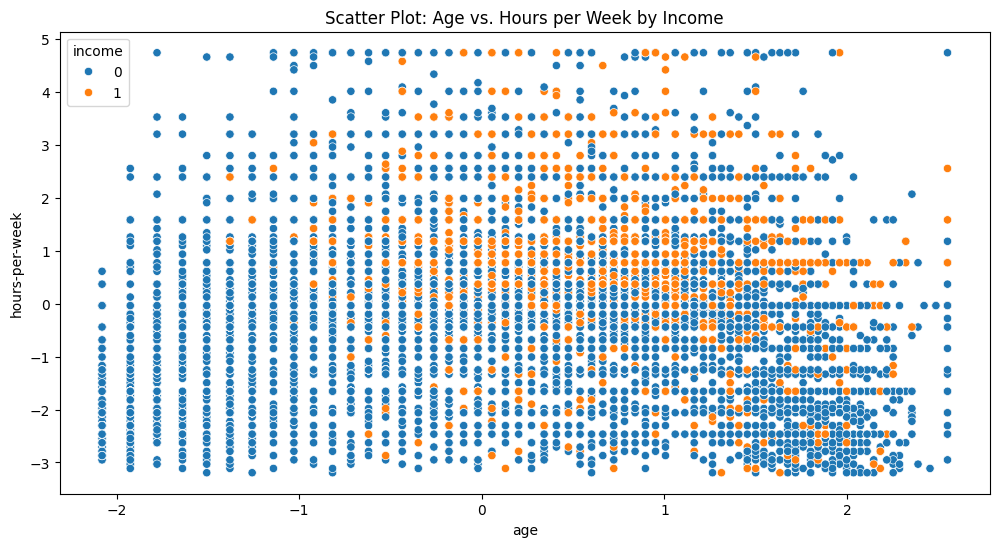

In [109]:
# TODO: Create at least three informative plots
# Example:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='age', y='hours-per-week', hue='income')
plt.title('Scatter Plot: Age vs. Hours per Week by Income')
plt.show()

# Create 2 more such plots of your own
# TODO: Explain insights gained from each plot

* The scatter plot shows the relationship between age and hours worked per week, colored by income level.
* There appears to be a clustering of points where individuals earning more than $50K tend to work more hours per week, especially in older age groups.
* Younger individuals tend to work fewer hours on average, regardless of income level.

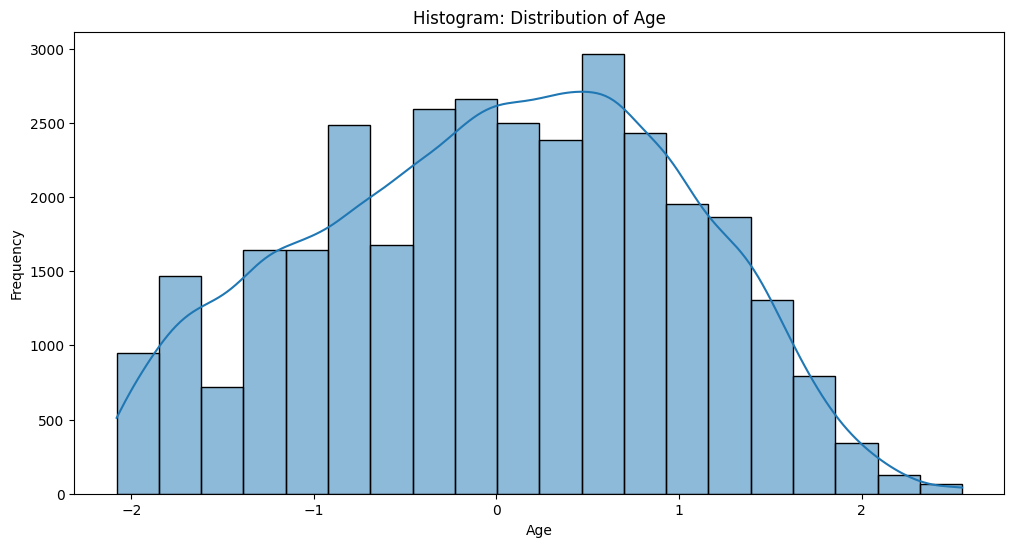

In [110]:
#histogram for Age
plt.figure(figsize=(12, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Histogram: Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

* The histogram shows the distribution of ages in the dataset.
* The age distribution appears to be roughly normal with a slight right skew, indicating that there are more younger individuals compared to older ones.
* There is a noticeable peak around ages 30-40, suggesting that this age group is well-represented in the dataset.

<ipython-input-111-14bb85733b3e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_hours, x='income', y='hours-per-week', palette='pastel')


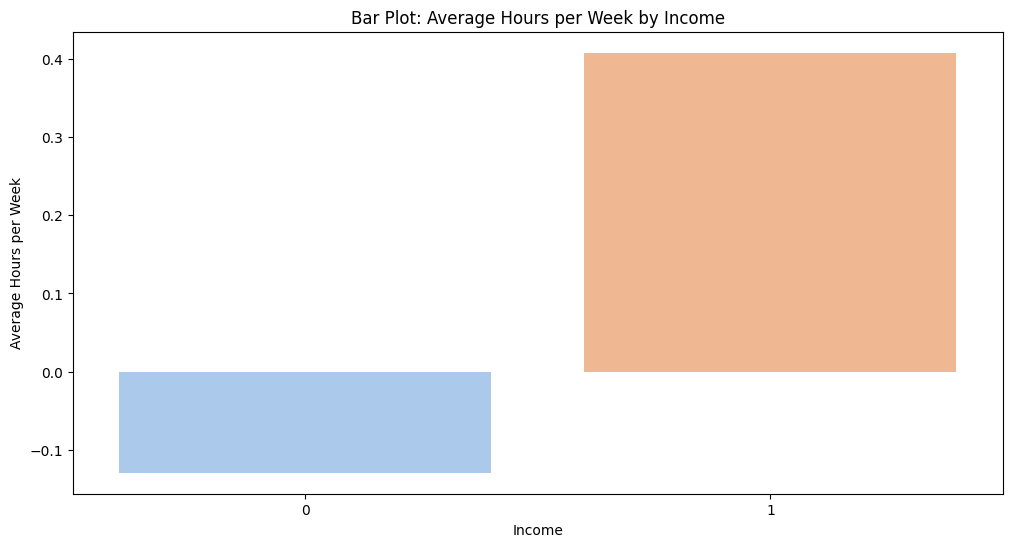

In [111]:
#bar plot for Average Hours per Week by Income
plt.figure(figsize=(12, 6))
average_hours = df.groupby('income')['hours-per-week'].mean().reset_index()
sns.barplot(data=average_hours, x='income', y='hours-per-week', palette='pastel')
plt.title('Bar Plot: Average Hours per Week by Income')
plt.xlabel('Income')
plt.ylabel('Average Hours per Week')
plt.show()

* The bar plot shows the average number of hours worked per week for each income class.
* Individuals earning more than 50K tend to work more hours on average compared to those earning less than or equal to 50K.
* This suggests that higher income may be associated with higher work commitments, which could be a factor in income classification.

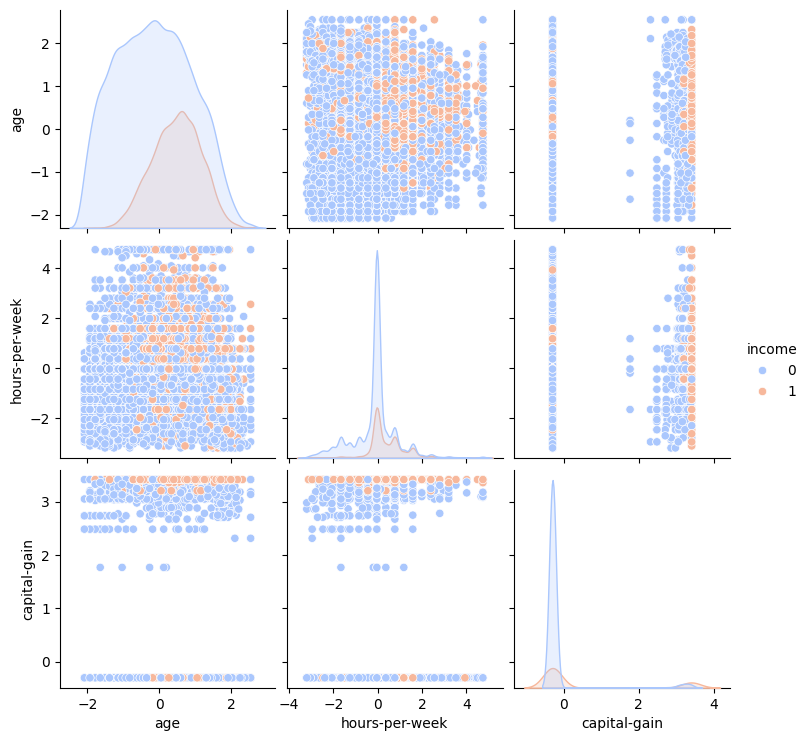

In [112]:
#pair plot for selected features colored by Income
selected_features = df[['age', 'hours-per-week', 'capital-gain', 'income']]
sns.pairplot(selected_features, hue='income', palette='coolwarm')
plt.show()

* Age vs. Capital Gain: Older individuals tend to have higher capital gains, especially in the '>50K' income group.
* Hours per Week vs. Capital Gain: There is a noticeable trend indicating that individuals who work more hours also tend to have higher capital gains.
* Age vs. Hours per Week: The relationship shows that older individuals generally work more hours, which aligns with previous findings.